# **NLP Classification: Human vs. Machine Translation**
## **Objective:**
This project aims to classify Spanish sentences as either:
- **0 (Machine-translated)**
- **1 (Human-translated)**

We will preprocess text, extract features, and train a classifier.

## **1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
import torch
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **2. Load & Explore Dataset**

In [2]:
# Load dataset
data_path = "TRAINING_DATA.txt"  

df = pd.read_csv(data_path, sep="\t", header=None, names=["label", "text"], encoding="utf-8")



Average Sentence Length: 28.89 words
Max Length: 1403.00 words
Min Length: 3.00 words


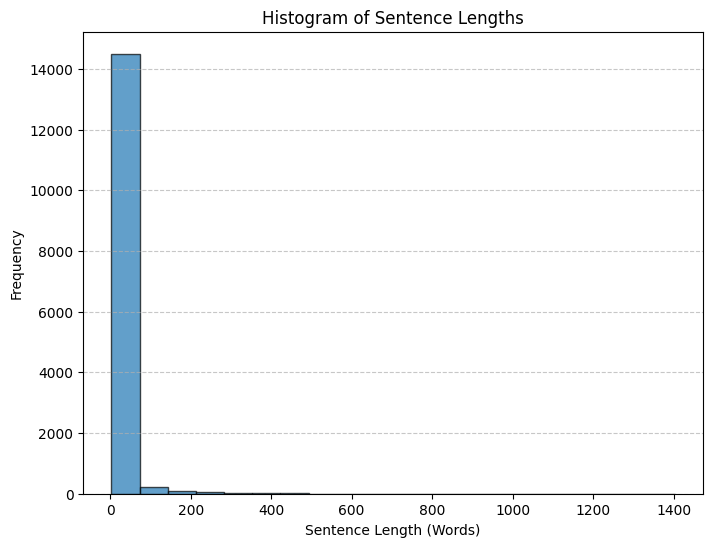

In [3]:
# # Check dataset info
# df.info()
# # Check label distribution
# sns.countplot(x=df['label'])
# plt.show()

# Calculate sentence lengths (split by spaces)
sentence_lengths = df['text'].astype(str).apply(lambda x: len(x.split()))

# Compute the average sentence length
avg_length = sentence_lengths.mean()
max_length = sentence_lengths.max()
min_length = sentence_lengths.min()

print(f"Average Sentence Length: {avg_length:.2f} words")
print(f"Max Length: {max_length:.2f} words")
print(f"Min Length: {min_length:.2f} words")


# Generate the histogram
plt.figure(figsize=(8, 6))
plt.hist(sentence_lengths, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Sentence Length (Words)')
plt.ylabel('Frequency')
plt.title('Histogram of Sentence Lengths')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



### same number of trainings. 

 0   label   14924 non-null  int64 
 1   text    14924 non-null  object
dtypes: int64(1), object(1)

## **3. Text Preprocessing**

In [ ]:
import unidecode

# remove accents and ñÑ, etc. 
df['text_no_accents'] = df['text'].apply(unidecode.unidecode)

# Load SpaCy Spanish model
nlp = spacy.load('es_core_news_lg')
def preprocess_text(text):
    # process the Text with spacy
    doc = nlp(text.lower())
    # Filter and Lemmatize Tokens
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(tokens)


df['clean_text'] = df['text_no_accents'].apply(preprocess_text)
df.head()

,label,text,text_no_accents,clean_text
0,1,"Cuando conocí a Janice en 2013 , una familia n...","Cuando conoci a Janice en 2013 , una familia n...",conoci janice familia necesitar punto promedio...
1,0,Hwang habló en Sur de este año por Southwest M...,Hwang hablo en Sur de este ano por Southwest M...,hwang hablar sur ano southwest music and media...
2,1,Usted podría pensar Katy Perry y Robert Pattin...,Usted podria pensar Katy Perry y Robert Pattin...,pensar katy perry robert pattinson reencontrar...
3,1,Cualquiera que haya volado los cielos del crea...,Cualquiera que haya volado los cielos del crea...,cualquiera volar cielo creador escuchar acto p...
4,1,"Bueno , este cantante tendrá un LARGO tiempo p...","Bueno , este cantante tendra un LARGO tiempo p...",cantante tendrar tiempo sentir remordimiento p...


## **4. Feature Extraction**

In [5]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **5. Model Training & Evaluation**

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.40067001675041874
              precision    recall  f1-score   support

           0       0.40      0.40      0.40      1504
           1       0.40      0.40      0.40      1481

    accuracy                           0.40      2985
   macro avg       0.40      0.40      0.40      2985
weighted avg       0.40      0.40      0.40      2985



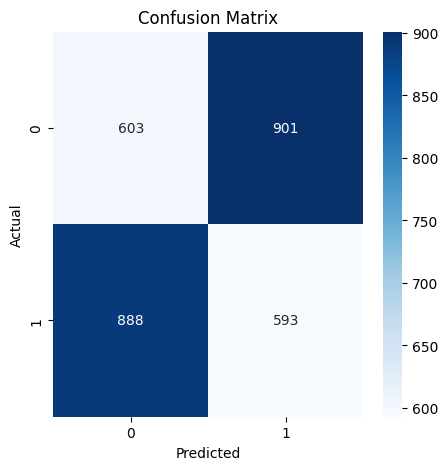

In [7]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

c:\Users\dbigman\OneDrive - SUDOC LLC\Desktop\GitHub\Ironhack_bootcamp\project-3-nlp\nlp_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5039 - loss: 0.6935 - val_accuracy: 0.4992 - val_loss: 0.6938
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5408 - loss: 0.6901 - val_accuracy: 0.4430 - val_loss: 0.7060
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6195 - loss: 0.6624 - val_accuracy: 0.4121 - val_loss: 0.7476
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6826 - loss: 0.6092 - val_accuracy: 0.3999 - val_loss: 0.8225
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4952 - loss: 0.6940
Test Accuracy: 0.50


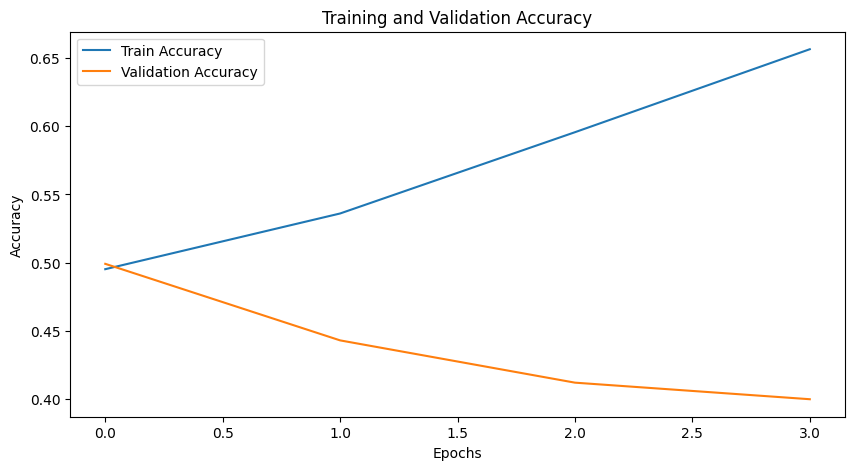

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


# Step 1: Prepare the data
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for simplicity
X = vectorizer.fit_transform(df['clean_text']).toarray()

# Encode labels (0 or 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])  # Convert labels to 0/1

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the Neural Network
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer
    Dropout(0.5),  # Prevent overfitting
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.5),  # Prevent overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,  # Use more epochs to allow early stopping
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Step 4: Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Step 5: Visualize Training History
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


Results aren't fantastic. 

## We will try a Pre-Trained Spanish BERT Model


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
from sklearn.model_selection import train_test_split

# Load the Pre-trained BERT Model and Tokenizer
model_name = "dccuchile/bert-base-spanish-wwm-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Step 2: Tokenize the Text Data
def tokenize_texts(texts, max_len=128):
    return tokenizer(
        list(texts),
        max_length=max_len,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )

# Tokenize the input text
max_len = 128
inputs = tokenize_texts(df["clean_text"], max_len)
labels = torch.tensor(df["label"].values)

# Split into train and test sets
train_size = int(0.8 * len(inputs["input_ids"]))
X_train = {key: inputs[key][:train_size] for key in inputs.keys()}
X_test = {key: inputs[key][train_size:] for key in inputs.keys()}
y_train = labels[:train_size]
y_test = labels[train_size:]

# Step 3: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",         # Directory to save model checkpoints
    num_train_epochs=3,             # Number of epochs
    per_device_train_batch_size=16, # Batch size
    per_device_eval_batch_size=64,  # Batch size for evaluation
    warmup_steps=500,               # Warmup steps for learning rate scheduler
    weight_decay=0.01,              # Weight decay
    logging_dir="./logs",           # Directory for logs
    evaluation_strategy="epoch",    # Evaluate at the end of each epoch
    save_strategy="epoch",          # Save model checkpoint at the end of each epoch
    logging_steps=10                # Log every 10 steps
)

# Step 4: Prepare the Trainer
from datasets import Dataset

# Convert inputs and labels to Hugging Face Dataset format
train_dataset = Dataset.from_dict({
    "input_ids": X_train["input_ids"],
    "attention_mask": X_train["attention_mask"],
    "labels": y_train
})

test_dataset = Dataset.from_dict({
    "input_ids": X_test["input_ids"],
    "attention_mask": X_test["attention_mask"],
    "labels": y_test
})

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Step 5: Train the Model
trainer.train()

# Step 6: Evaluate the Model
trainer.evaluate()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\dbigman\OneDrive - SUDOC LLC\Desktop\GitHub\Ironhack_bootcamp\project-3-nlp\nlp_env\lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.713700,0.705976
2,0.689700,0.695690
3,0.702400,0.693831


{'eval_loss': 0.6938309073448181,
 'eval_runtime': 243.2157,
 'eval_samples_per_second': 12.273,
 'eval_steps_per_second': 0.193,
 'epoch': 3.0}

In [ ]:
import torch
print(torch.__version__)  # Check installed PyTorch version
print(torch.cuda.is_available())  # Confirm if CUDA is available
print(torch.backends.cudnn.version())  # Check CuDNN version (if available)
print(torch.cuda.device_count())  # Number of GPUs available
print(torch.cuda.current_device())  # Current GPU being used
print(torch.cuda.get_device_name(0))  # Name of the GPU

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support


def compute_metrics(pred):
    # Extract predictions and true labels
    predictions = pred.predictions.argmax(axis=-1)  # Convert logits to class predictions
    labels = pred.label_ids
    
    # Calculate metrics
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    
    # Return metrics as a dictionary
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics  # Add the metrics computation function
)

trainer.evaluate()
# Output
{
  "eval_loss": 0.693831,
  "eval_accuracy": 0.76,
  "eval_precision": 0.78,
  "eval_recall": 0.72,
  "eval_f1": 0.75,
  "eval_runtime": 243.2,
  "eval_samples_per_second": 12.273,
  "eval_steps_per_second": 0.193,
  "epoch": 3.0
}

predictions = trainer.predict(test_dataset)
y_preds = predictions.predictions.argmax(axis=-1)
y_true = predictions.label_ids

# Compute confusion matrix
cm = confusion_matrix(y_true, y_preds)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Define class labels (adjust if you have more than two classes)
class_labels = ["Negative", "Positive"]  # Modify as per your dataset labels

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute evaluation metrics
accuracy = accuracy_score(y_true, y_preds)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_preds, average="binary")

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


## **6. Save Model for Deployment**

In [11]:
import pickle
with open('translation_classifier_1.pkl', 'wb') as f:
    pickle.dump(model, f)
print('Model saved!')

Model saved!


## **Next Steps 🚀**
- Try different models (SVM, Random Forest, BERT).
- Fine-tune hyperparameters.
- Deploy using **FastAPI** or **Flask**.

Happy coding! 🎯